# Uber Data

All trips, starting November 2018, reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance.
Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Fares are rounded to the nearest $2.50 and tips are rounded to the nearest $1.00.
For a discussion of the approach to privacy in this dataset, please see http://dev.cityofchicago.org/open%20data/data%20portal/2019/04/12/tnp-taxi-privacy.html.

## Wrangle DataFrame

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Project: Part 1

In [136]:
df = pd.read_csv('Transportation_Network_Providers_-_Trips.csv', header=0, nrows=50000, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

In [137]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,49998.000000,50000.000000,3.578400e+04,3.562900e+04,47185.000000,46765.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,47221.000000,47221.000000,46806.000000,46806.000000
mean,1043.288172,5.807018,1.703136e+10,1.703137e+10,25.402649,25.920517,10.798150,0.55484,2.719840,14.072830,1.341940,41.892127,-87.666129,41.892829,-87.667459
std,731.309380,6.454516,3.308574e+05,3.362279e+05,20.138024,20.471896,9.059441,1.55728,1.899201,10.741607,0.825755,0.062307,0.059761,0.061831,0.062644
min,3.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.00000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,520.000000,1.700000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.00000,2.500000,7.550000,1.000000,41.877406,-87.682996,41.877406,-87.683506
50%,856.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.00000,2.550000,10.050000,1.000000,41.893216,-87.653022,41.893216,-87.652534
75%,1370.000000,7.300000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.00000,2.550000,15.300000,1.000000,41.929263,-87.631864,41.929330,-87.631864
max,13666.000000,245.900000,1.703198e+10,1.703198e+10,77.000000,77.000000,252.500000,30.00000,22.570000,261.440000,11.000000,42.021224,-87.534903,42.021224,-87.534903


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
Trip ID                       50000 non-null object
Trip Start Timestamp          50000 non-null datetime64[ns]
Trip End Timestamp            50000 non-null datetime64[ns]
Trip Seconds                  49998 non-null float64
Trip Miles                    50000 non-null float64
Pickup Census Tract           35784 non-null float64
Dropoff Census Tract          35629 non-null float64
Pickup Community Area         47185 non-null float64
Dropoff Community Area        46765 non-null float64
Fare                          50000 non-null float64
Tip                           50000 non-null int64
Additional Charges            50000 non-null float64
Trip Total                    50000 non-null float64
Shared Trip Authorized        50000 non-null bool
Trips Pooled                  50000 non-null int64
Pickup Centroid Latitude      47221 non-null float64
Pickup Centroid Longitude     47221 n

In [139]:
df = df.dropna(how='any',axis=0) 

## Visual Graphs

#### Histograms

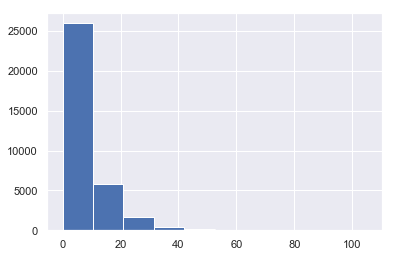

In [140]:
plt.hist(df['Fare'])
plt.show()

In [141]:
import seaborn as sns;

# Set up seaborn dark grid
sns.set()

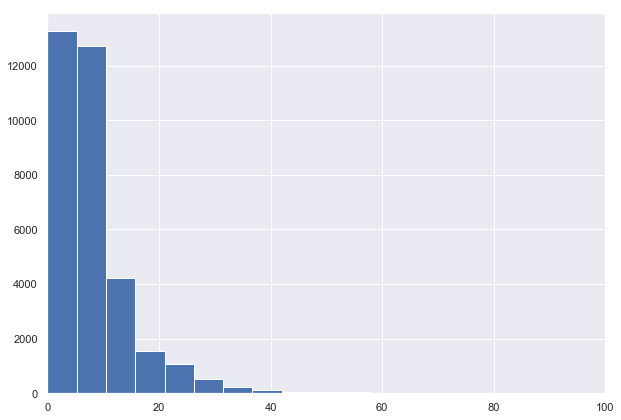

In [142]:
plt.figure(figsize=(10,7))
plt.xlim(0,100)
plt.hist(df['Fare'], bins=20)
plt.show()

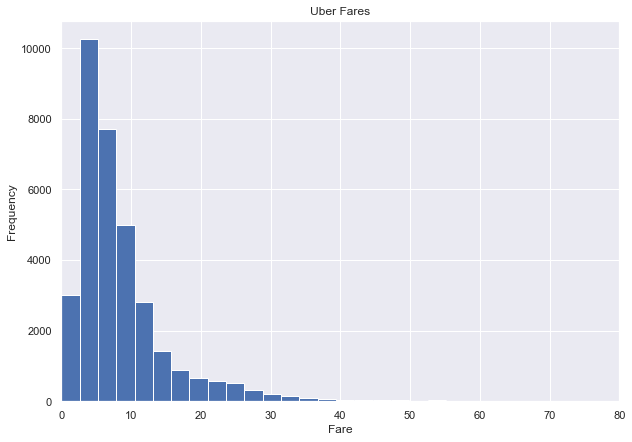

In [143]:
plt.figure(figsize=(10,7))
plt.xlim(0,80)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Uber Fares')
plt.hist(df['Fare'], bins=40)
plt.show()

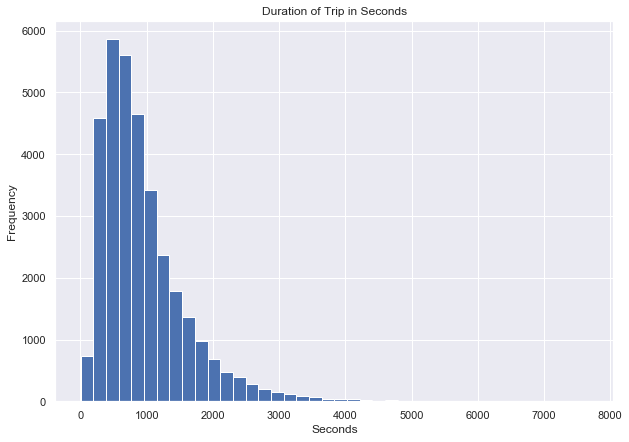

In [221]:
plt.figure(figsize=(10,7))
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Duration of Trip in Seconds')
plt.hist(df['Trip Seconds'], bins=40)
plt.show()

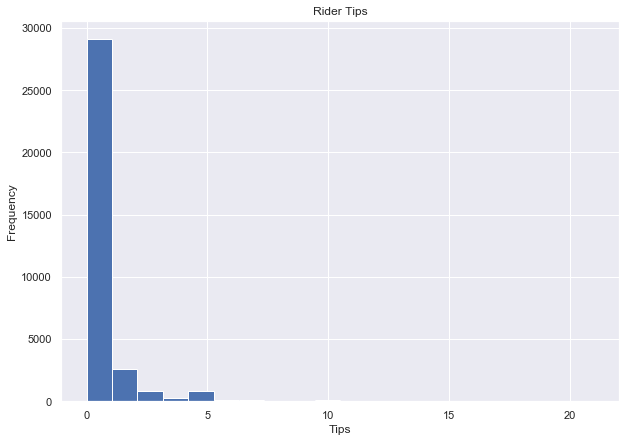

In [145]:
plt.figure(figsize=(10,7))
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Rider Tips')
plt.hist(df['Tip'], bins=20)
plt.show()

#### Box Plots

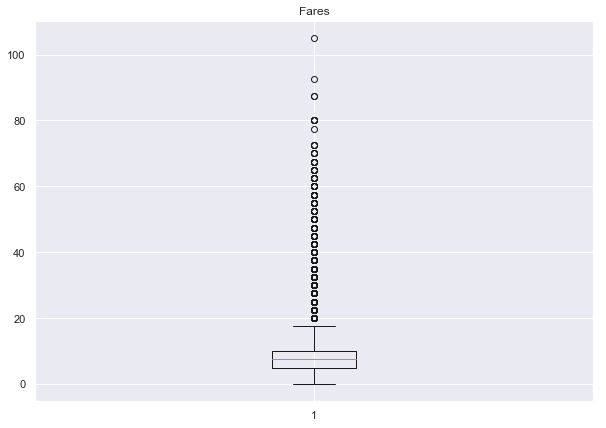

In [215]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares')
plt.show()

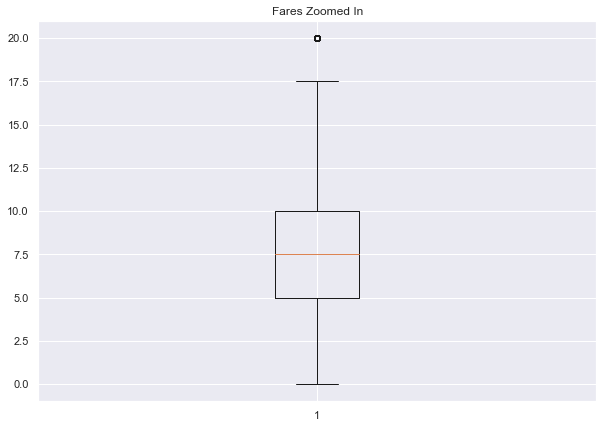

In [222]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares Zoomed In')
plt.ylim(-1,21)
plt.show()

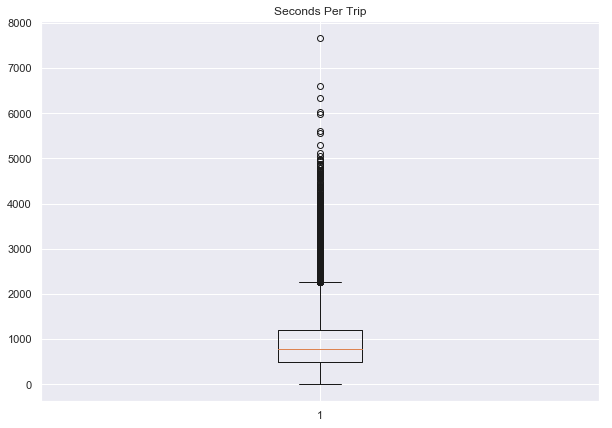

In [217]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Trip Seconds'])
plt.title('Seconds Per Trip')
plt.show()

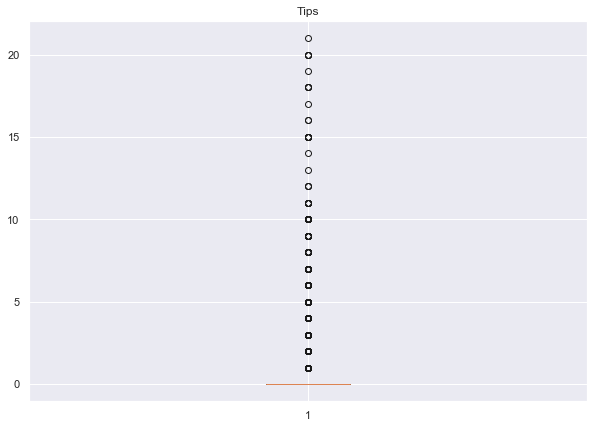

In [218]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Tip'])
plt.title('Tips')
plt.show()

#### Scatter Plots

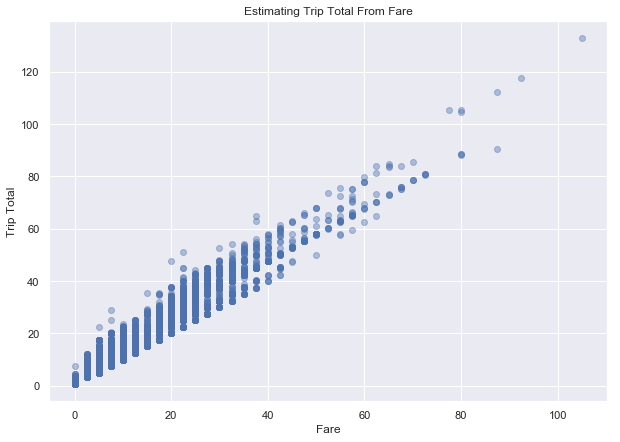

In [220]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

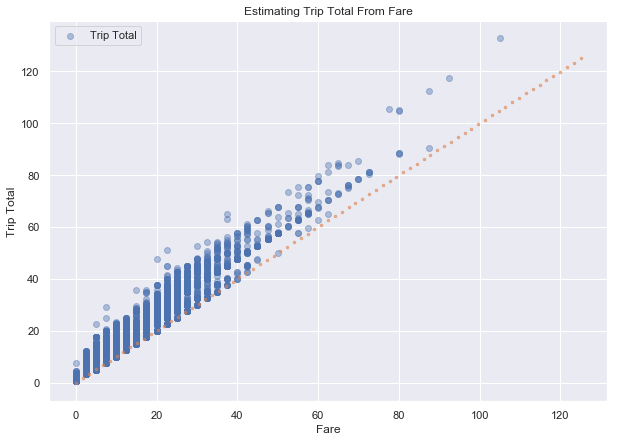

In [258]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
x = np.linspace(0,125,75)
y = x
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.scatter(x, y, alpha=0.6, marker=".", linewidths=0.5)
plt.legend(loc='upper left')
plt.show()

Hypothesis: Riders who take longer trips are more likely to tip.

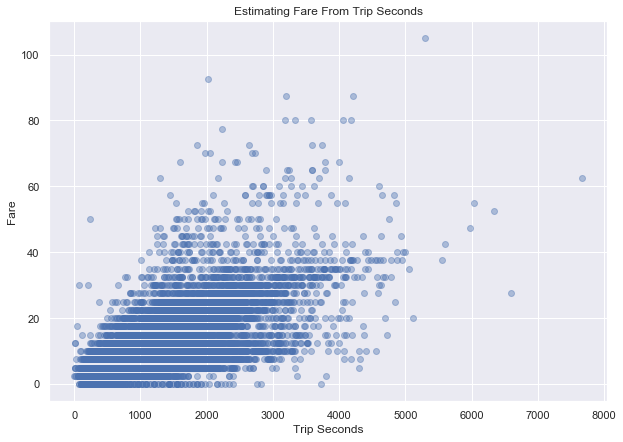

In [259]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Seconds'], df['Fare'], alpha = 0.4)
plt.ylabel('Fare')
plt.xlabel('Trip Seconds')
plt.title('Estimating Fare From Trip Seconds')
plt.show()

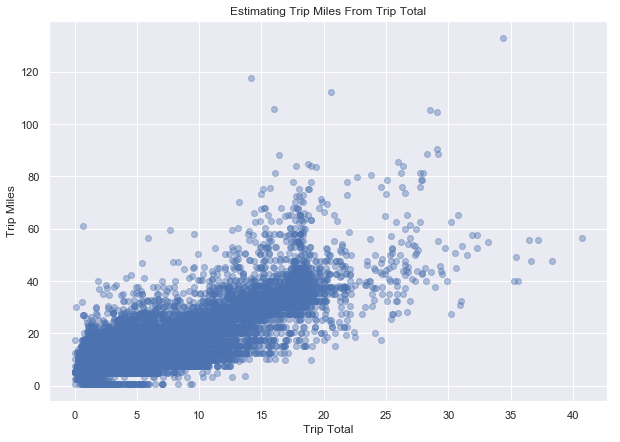

In [260]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Miles'], df['Trip Total'], alpha = 0.4)
plt.ylabel('Trip Miles')
plt.xlabel('Trip Total')
plt.title('Estimating Trip Miles From Trip Total')
plt.show()

## Project: Part 2

#### Tips

In [155]:
# Stats on Tips
df['Tip'].describe()

count    33926.000000
mean         0.506838
std          1.351000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: Tip, dtype: float64

Ouch.

In [156]:
# New df on tippers
df_tippers = df.loc[df['Tip'] != 0.0]

In [157]:
# Stats on tippers
df_tippers['Tip'].describe()

count    6456.000000
mean        2.663414
std         1.961583
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        21.000000
Name: Tip, dtype: float64

In [158]:
# Probability of getting a tip
df_tippers.Tip.count() / df.Tip.count()

0.190296527736839

Check to see if riders tip more in certain areas.

In [159]:
# Find mean tip in community areas
df_community_mean = df.groupby(['Pickup Community Area']).mean()

# Show results
df_community_mean.sort_values(by=['Tip'], ascending=False).head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
76.0,2214.838493,17.412517,1.703197e+10,1.703130e+10,19.908479,27.806191,1.919246,7.316851,37.042288,0.118439,1.148048,41.979197,-87.901301,41.905780,-87.652422
56.0,1813.014760,13.177860,1.703197e+10,1.703134e+10,21.531365,21.734317,1.804428,7.023395,30.562140,0.114391,1.162362,41.786471,-87.751490,41.894089,-87.646248
72.0,1224.416667,9.066667,1.703172e+10,1.703156e+10,49.500000,14.375000,0.916667,3.190000,18.481667,0.250000,1.333333,41.710570,-87.680673,41.785807,-87.681277
64.0,2115.166667,9.666667,1.703164e+10,1.703150e+10,49.500000,13.750000,0.833333,2.588333,17.171667,0.333333,1.666667,41.778946,-87.763025,41.807090,-87.682051
75.0,972.777778,7.255556,1.703175e+10,1.703172e+10,62.888889,13.472222,0.777778,3.206111,17.456111,0.055556,1.055556,41.687743,-87.666753,41.750457,-87.675489
12.0,1584.888889,7.522222,1.703112e+10,1.703155e+10,29.555556,12.500000,0.777778,4.200000,17.477778,0.444444,1.444444,41.988022,-87.751908,41.968365,-87.757456
5.0,1019.101732,4.495887,1.703116e+10,1.703130e+10,18.196970,9.913420,0.714286,2.397186,13.024892,0.257576,1.303030,41.949080,-87.681909,41.927505,-87.673374
9.0,1883.714286,8.457143,1.703109e+10,1.703136e+10,21.285714,13.928571,0.714286,2.900000,17.542857,0.285714,1.285714,42.006986,-87.813168,41.957822,-87.740691
33.0,923.469657,4.147625,1.703141e+10,1.703145e+10,27.728232,9.139182,0.712401,3.318364,13.169947,0.224274,1.311346,41.857826,-87.619452,41.881195,-87.648971


In [160]:
# Show sample of riders that make mean
df.groupby(['Pickup Community Area']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
Pickup Community Area,,,,,,,,,,,,,,,,,,,,
1.0,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337
2.0,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
3.0,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874
4.0,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358
5.0,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
6.0,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836
7.0,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516
8.0,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093
9.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [161]:
# Show community areas with most rides
df.groupby(['Pickup Community Area']).count().sort_values(by=['Tip'], ascending=False).head(10)

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
Pickup Community Area,,,,,,,,,,,,,,,,,,,,
8.0,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093
32.0,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821
28.0,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747,3747
6.0,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836
24.0,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824
7.0,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516
22.0,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509
3.0,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874
33.0,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758


In [162]:
# Use large samples of greater than 30 only
df_community_mean_large_sample = df_community_mean[df.groupby(['Pickup Community Area']).count()>=30]

# Show results
df_community_mean_large_sample.head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
1.0,1111.700297,5.559941,1.703109e+10,1.703123e+10,19.753709,10.519288,0.655786,2.497418,13.672493,0.302671,1.436202,42.007996,-87.668074,41.957241,-87.672890
2.0,1193.038043,5.451630,1.703102e+10,1.703123e+10,17.576087,9.565217,0.315217,2.234674,12.115109,0.461957,1.538043,41.998558,-87.692050,41.957993,-87.681446
3.0,950.994279,4.709039,1.703114e+10,1.703126e+10,19.278032,9.362128,0.532037,2.396053,12.290217,0.258581,1.348970,41.964997,-87.657588,41.932045,-87.662911
4.0,1030.000000,4.602514,1.703117e+10,1.703124e+10,18.083799,9.371508,0.625698,2.531313,12.528520,0.229050,1.290503,41.971269,-87.685511,41.941884,-87.676804
5.0,1019.101732,4.495887,1.703116e+10,1.703130e+10,18.196970,9.913420,0.714286,2.397186,13.024892,0.257576,1.303030,41.949080,-87.681909,41.927505,-87.673374
6.0,901.288082,4.026657,1.703113e+10,1.703127e+10,16.681946,9.077045,0.445698,2.415346,11.938089,0.215797,1.285614,41.942885,-87.652866,41.921735,-87.662173
7.0,822.922893,3.360612,1.703119e+10,1.703131e+10,16.579094,8.153816,0.369237,2.373263,10.896316,0.207075,1.266296,41.923006,-87.648153,41.912777,-87.656999
8.0,805.575779,3.451910,1.703113e+10,1.703136e+10,21.219512,8.362823,0.505005,2.531156,11.398984,0.180037,1.234457,41.896516,-87.629549,41.899979,-87.653880
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# Drop community areas with less than 30
df_community_mean_large_sample = df_community_mean_large_sample.dropna(how='any',axis=0) 

# Show results
df_community_mean_large_sample.sort_values(by=['Tip'], ascending=False).head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
76.0,2214.838493,17.412517,1.703197e+10,1.703130e+10,19.908479,27.806191,1.919246,7.316851,37.042288,0.118439,1.148048,41.979197,-87.901301,41.905780,-87.652422
56.0,1813.014760,13.177860,1.703197e+10,1.703134e+10,21.531365,21.734317,1.804428,7.023395,30.562140,0.114391,1.162362,41.786471,-87.751490,41.894089,-87.646248
5.0,1019.101732,4.495887,1.703116e+10,1.703130e+10,18.196970,9.913420,0.714286,2.397186,13.024892,0.257576,1.303030,41.949080,-87.681909,41.927505,-87.673374
33.0,923.469657,4.147625,1.703141e+10,1.703145e+10,27.728232,9.139182,0.712401,3.318364,13.169947,0.224274,1.311346,41.857826,-87.619452,41.881195,-87.648971
1.0,1111.700297,5.559941,1.703109e+10,1.703123e+10,19.753709,10.519288,0.655786,2.497418,13.672493,0.302671,1.436202,42.007996,-87.668074,41.957241,-87.672890
4.0,1030.000000,4.602514,1.703117e+10,1.703124e+10,18.083799,9.371508,0.625698,2.531313,12.528520,0.229050,1.290503,41.971269,-87.685511,41.941884,-87.676804
10.0,889.350000,5.245000,1.703114e+10,1.703132e+10,29.275000,10.250000,0.625000,3.035000,13.910000,0.175000,1.100000,41.986168,-87.805639,41.971113,-87.764599
77.0,994.997763,5.146980,1.703103e+10,1.703122e+10,22.736018,9.703579,0.619687,2.477181,12.800447,0.232662,1.302013,41.985956,-87.662764,41.944664,-87.669930
32.0,868.421617,3.903245,1.703161e+10,1.703138e+10,23.607171,8.820335,0.602722,2.598236,12.021293,0.207537,1.268778,41.879894,-87.627564,41.891892,-87.654343


Use bootstrap functions to calculate confidence intervals

In [198]:
#Returns the result of a function, like np.mean(), for a replicate
def bootstrap_replicate_1d(data, func, data_subset):
    return func(np.random.choice(data, size=len(data_subset)))

#Calls above function to produce results of desired function, like np.mean, for all replicants
def draw_bs_reps(data, func, data_subset, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, data_subset)

    return bs_replicates


In [200]:
def bootstrap_plot(y, data_subset, color='c', alpha=0.7, title='Mean Tip', bins=25):
    
    # Compute actual mean
    mean = y.mean()
    print("The actual mean is:", mean)

    # Take 10,000 bootstrap replicates of the mean: bs_replicates
    bs_replicates = draw_bs_reps(y, np.mean, data_subset, size=10000)
    
    # Compute bootstrapped mean
    bs_mean = bs_replicates.mean()
    print("The boostrapped mean is:", bs_mean)

    # Compute and print SEM
    sem = np.std(y) / np.sqrt(len(y))
    print("The standard error of the mean is:", sem)
    
    # Compute and print standard deviation of bootstrap replicates
    bs_std = np.std(bs_replicates)
    print("The standard deviation of the bootstrapped mean is:", bs_std)
    
    # This is a 95% Confidence Interval
    CI = np.percentile(bs_replicates,[2.5, 97.5])
    print("We are 95% confident that the true mean is captured by the following interval:", CI)
    
    # This is a 99% Confidence Interval
    CI_2 = np.percentile(bs_replicates,[0.5, 99.5])
    print("We are 99% confident that the true mean is captured by the following interval:", CI_2)

    # Make a histogram of the results
    plt.figure(figsize=(10,7))
    plt.hist(bs_replicates, bins=bins, density=True, color=color, alpha=alpha)
    plt.xlabel('Bootstrap Mean')
    plt.ylabel('PDF')
    plt.title(title, fontsize=15)
    plt.show()
    
    # Show the plot
    plt.show()
    
    return bs_replicates

The actual mean is: 0.5068384130165655
The boostrapped mean is: 0.5068784383658551
The standard error of the mean is: 0.007334702658957736
The standard deviation of the bootstrapped mean is: 0.007280371554700814
We are 95% confident that the true mean is captured by the following interval: [0.49263102 0.52128161]
We are 99% confident that the true mean is captured by the following interval: [0.488799   0.52596828]


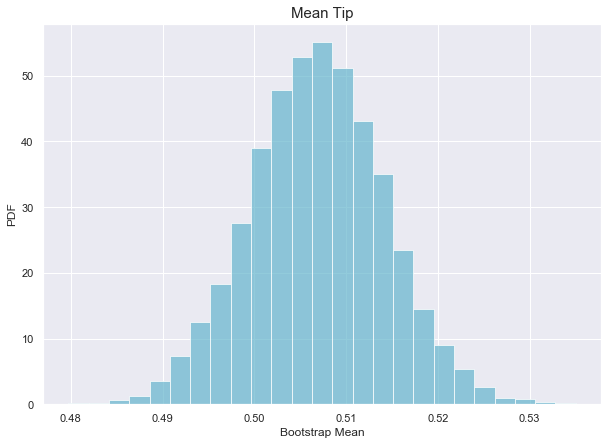

In [201]:
reps = bootstrap_plot(df['Tip'], df)

In [167]:
#Find the probability of 5
p = np.sum(reps >= 1) / len(reps)
print('Given our sample, the proability that the mean tip is greater than 1 is ', p)

Given our sample, the proability that the mean tip is greater than 1 is  0.0


In conclusion, riders in community areas 76 and 56 definitely tip more.

## Geography

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33926 entries, 1 to 49999
Data columns (total 21 columns):
Trip ID                       33926 non-null object
Trip Start Timestamp          33926 non-null datetime64[ns]
Trip End Timestamp            33926 non-null datetime64[ns]
Trip Seconds                  33926 non-null float64
Trip Miles                    33926 non-null float64
Pickup Census Tract           33926 non-null float64
Dropoff Census Tract          33926 non-null float64
Pickup Community Area         33926 non-null float64
Dropoff Community Area        33926 non-null float64
Fare                          33926 non-null float64
Tip                           33926 non-null int64
Additional Charges            33926 non-null float64
Trip Total                    33926 non-null float64
Shared Trip Authorized        33926 non-null bool
Trips Pooled                  33926 non-null int64
Pickup Centroid Latitude      33926 non-null float64
Pickup Centroid Longitude     33926 n

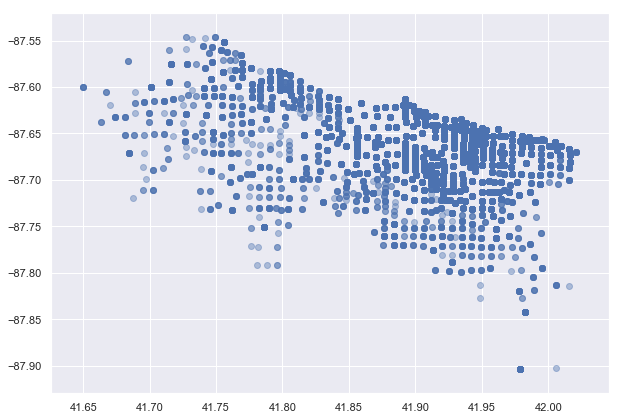

In [169]:
plt.figure(figsize=(10,7))
plt.scatter(df['Pickup Centroid Latitude'], df['Pickup Centroid Longitude'], alpha=0.4)
plt.show()

In [170]:
df[df['Pickup Community Area']==76].head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
6,10c606db69c16f847182da6ba76296c5c29d1fd7,2018-11-14 21:45:00,2018-11-14 22:30:00,2250.0,21.3,1.703198e+10,1.703133e+10,76.0,33.0,37.5,...,7.50,52.00,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.861281,-87.630580,POINT (-87.6305800611 41.8612808467)
113,10c633e2c3c23498df5025e8ec35ecd9a08b86a8,2019-01-27 13:30:00,2019-01-27 14:15:00,2363.0,17.9,1.703198e+10,1.703132e+10,76.0,32.0,27.5,...,8.31,35.81,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234)
404,10c6cb848b188c8802b7ec84d09b35a477266256,2019-01-21 15:45:00,2019-01-21 16:30:00,2096.0,17.3,1.703198e+10,1.703108e+10,76.0,8.0,25.0,...,7.97,32.97,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
449,10c6e6d5da88101f26a76a6a527306ed1f585b50,2019-01-28 14:45:00,2019-01-28 15:00:00,1552.0,11.7,1.703198e+10,1.703102e+10,76.0,2.0,17.5,...,7.55,25.05,True,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),42.000875,-87.701803,POINT (-87.701802904 42.0008748252)
484,10c6f97a5189b96bebbf19054f89b0188c654294,2019-01-24 13:15:00,2019-01-24 13:30:00,1138.0,11.4,1.703198e+10,1.703116e+10,76.0,16.0,17.5,...,8.96,26.46,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.959210,-87.712973,POINT (-87.7129731725 41.9592101847)


In [171]:
df[df['Pickup Community Area']==56].head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
82,10c6258f9670a10fa5e0d1b55c7b1a7ea5227d1f,2019-01-13 21:45:00,2019-01-13 22:00:00,1591.0,14.6,1.703198e+10,1.703124e+10,56.0,24.0,20.0,...,8.15,28.15,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.892658,-87.652534,POINT (-87.6525344838 41.8926581076)
99,10c62dca1f8e45b98f853e77872d62ad1b6ebefb,2019-03-02 13:45:00,2019-03-02 14:15:00,1544.0,9.7,1.703156e+10,1.703128e+10,56.0,28.0,17.5,...,2.55,20.05,False,1,41.803907,-87.747948,POINT (-87.7479478988 41.8039071154),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
421,10c6d69d82c0a20797978b46694cc0ea4920b600,2019-03-15 08:45:00,2019-03-15 09:30:00,2443.0,13.0,1.703198e+10,1.703108e+10,56.0,8.0,42.5,...,7.85,50.35,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)
433,10c6dedc336872b9725837303e2b22c3e222cba1,2019-02-20 00:45:00,2019-02-20 01:15:00,1512.0,14.6,1.703198e+10,1.703108e+10,56.0,8.0,37.5,...,7.85,45.35,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.907520,-87.626659,POINT (-87.6266589003 41.9075200747)
555,10c71aff1d6382e0d0f37cad6866916a9a3a77c7,2019-03-15 13:00:00,2019-03-15 13:45:00,2617.0,11.3,1.703198e+10,1.703183e+10,56.0,28.0,22.5,...,7.55,30.05,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.879067,-87.657005,POINT (-87.657005027 41.8790669938)


## Pooled Rides

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33926 entries, 1 to 49999
Data columns (total 21 columns):
Trip ID                       33926 non-null object
Trip Start Timestamp          33926 non-null datetime64[ns]
Trip End Timestamp            33926 non-null datetime64[ns]
Trip Seconds                  33926 non-null float64
Trip Miles                    33926 non-null float64
Pickup Census Tract           33926 non-null float64
Dropoff Census Tract          33926 non-null float64
Pickup Community Area         33926 non-null float64
Dropoff Community Area        33926 non-null float64
Fare                          33926 non-null float64
Tip                           33926 non-null int64
Additional Charges            33926 non-null float64
Trip Total                    33926 non-null float64
Shared Trip Authorized        33926 non-null bool
Trips Pooled                  33926 non-null int64
Pickup Centroid Latitude      33926 non-null float64
Pickup Centroid Longitude     33926 n

In [261]:
df['Income'] = df['Fare']*0.75 + df['Tip'] - df['Additional Charges']
df['Income_Per_Minute'] = df['Income']/df['Trip Seconds']*60

In [264]:
df_income = df[['Fare','Tip', 'Additional Charges', 'Shared Trip Authorized', 'Trips Pooled', 'Trip Total', 'Income', 'Pickup Community Area', 'Dropoff Community Area', 'Income_Per_Minute']]

In [265]:
df_income.sort_values(by=['Income'], ascending=False).head(10)

,Fare,Tip,Additional Charges,Shared Trip Authorized,Trips Pooled,Trip Total,Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
7242,105.0,20,7.85,False,1,132.85,90.900,32.0,56.0,1.029639
41524,92.5,18,7.05,False,1,117.55,80.325,8.0,56.0,2.391811
13761,87.5,17,7.85,False,1,112.35,74.775,8.0,76.0,1.402470
8872,77.5,21,7.05,False,1,105.55,72.075,6.0,76.0,1.939238
26815,80.0,16,8.60,False,1,104.60,67.400,32.0,76.0,0.997287
48210,80.0,16,9.30,False,1,105.30,66.700,8.0,76.0,1.258491
33874,87.5,0,2.85,False,1,90.35,62.775,3.0,22.0,0.895506
3175,55.0,18,2.55,False,1,75.55,56.700,6.0,3.0,0.924205
23158,65.0,12,7.85,False,1,84.85,52.900,8.0,76.0,0.883630
42312,65.0,11,7.55,False,1,83.55,52.200,8.0,76.0,0.966368


In [176]:
df_income.sort_values(by=['Income_Per_Minute'], ascending=False).head(10)

,Fare,Tip,Additional Charges,Shared Trip Authorized,Trips Pooled,Trip Total,Driver Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
47751,12.5,0,2.50,False,1,15.00,9.375,8.0,32.0,80.357143
32974,12.5,0,2.50,False,1,15.00,9.375,5.0,32.0,62.500000
18869,17.5,5,2.50,False,1,25.00,18.125,8.0,28.0,26.524390
17838,5.0,0,0.00,True,1,5.00,3.750,24.0,24.0,25.000000
33913,5.0,0,0.00,True,1,5.00,3.750,8.0,8.0,22.500000
5985,2.5,0,2.55,False,1,5.05,1.875,32.0,32.0,22.500000
2267,5.0,0,2.50,False,1,7.50,3.750,32.0,8.0,17.307692
35030,30.0,0,0.00,True,1,30.00,22.500,28.0,28.0,17.088608
15885,7.5,0,0.00,True,2,7.50,5.625,8.0,8.0,12.053571
26895,50.0,9,2.05,False,1,61.05,46.500,28.0,28.0,11.576763


In [177]:
df_income.describe()

,Fare,Tip,Additional Charges,Trips Pooled,Trip Total,Driver Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
count,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000
mean,9.265239,0.506838,2.595344,1.327507,12.367421,7.455768,21.855568,22.381035,0.541660
std,6.943456,1.351000,1.658362,0.809051,8.457560,5.738242,17.381406,17.861690,0.684837
min,0.000000,0.000000,0.000000,1.000000,0.670000,0.000000,1.000000,1.000000,0.000000
25%,5.000000,0.000000,2.550000,1.000000,7.550000,3.750000,8.000000,8.000000,0.390286
50%,7.500000,0.000000,2.550000,1.000000,10.050000,5.625000,22.000000,22.000000,0.495127
75%,10.000000,0.000000,2.550000,1.000000,14.550000,9.375000,32.000000,32.000000,0.630694
max,105.000000,21.000000,12.710000,11.000000,132.850000,98.750000,77.000000,77.000000,80.357143


In [178]:
df_pooled = df_income[df_income['Shared Trip Authorized'] == True]

In [179]:
df_pooled.describe()

,Fare,Tip,Additional Charges,Trips Pooled,Trip Total,Driver Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
count,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000
mean,6.851807,0.193941,1.286010,2.351868,8.331758,5.332796,23.557610,23.413067,0.364993
std,4.750120,0.706234,1.420998,1.147675,4.878028,3.739155,17.394984,17.241201,0.505384
min,0.000000,0.000000,0.000000,1.000000,0.670000,0.000000,1.000000,1.000000,0.000000
25%,5.000000,0.000000,0.000000,2.000000,5.050000,3.750000,8.000000,8.000000,0.191164
50%,5.000000,0.000000,0.670000,2.000000,7.500000,3.750000,24.000000,24.000000,0.289203
75%,7.500000,0.000000,2.550000,3.000000,10.000000,5.750000,32.000000,32.000000,0.455466
max,57.500000,20.000000,9.070000,11.000000,66.500000,52.125000,77.000000,77.000000,25.000000


The actual mean is: 7.455767700288864
The boostrapped mean is: 7.455559559040263
The standard error of the mean is: 0.03115344650597049
The standard deviation of the bootstrapped mean is: 0.03115822192271721
We are 95% confident that the true mean is captured by the following interval: [7.39533682 7.51764521]
We are 99% confident that the true mean is captured by the following interval: [7.37725459 7.53648115]


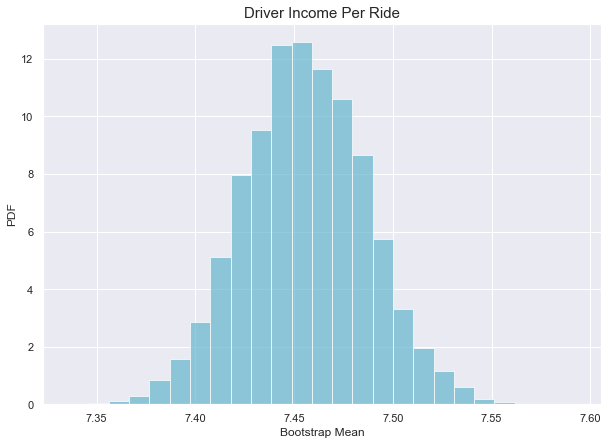

In [203]:
pooled_reps = bootstrap_plot(df['Driver Income'], df, title='Driver Income Per Ride')

The actual mean is: 7.455767700288864
The boostrapped mean is: 7.455760951758121
The standard error of the mean is: 0.03115344650597049
The standard deviation of the bootstrapped mean is: 0.06300668863647095
We are 95% confident that the true mean is captured by the following interval: [7.33312941 7.57852347]
We are 99% confident that the true mean is captured by the following interval: [7.29605023 7.62322561]


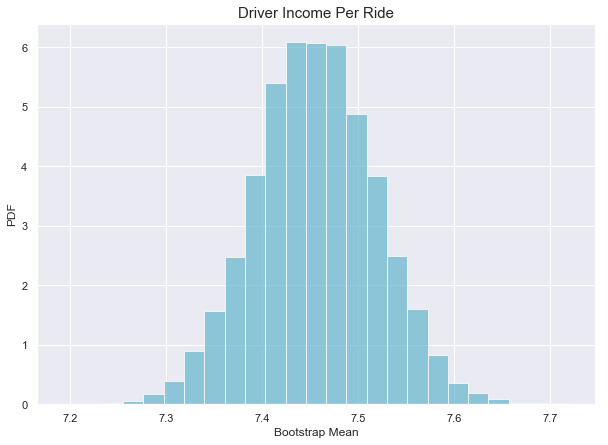

In [204]:
pooled_reps = bootstrap_plot(df['Driver Income'], df_pooled, title='Driver Income Per Ride')

The actual mean is: 0.5416598941736135
The boostrapped mean is: 0.5416914521334938
The standard error of the mean is: 0.0037180445644217123
The standard deviation of the bootstrapped mean is: 0.0037492793435620667
We are 95% confident that the true mean is captured by the following interval: [0.53510018 0.54988349]
We are 99% confident that the true mean is captured by the following interval: [0.53341726 0.55230336]


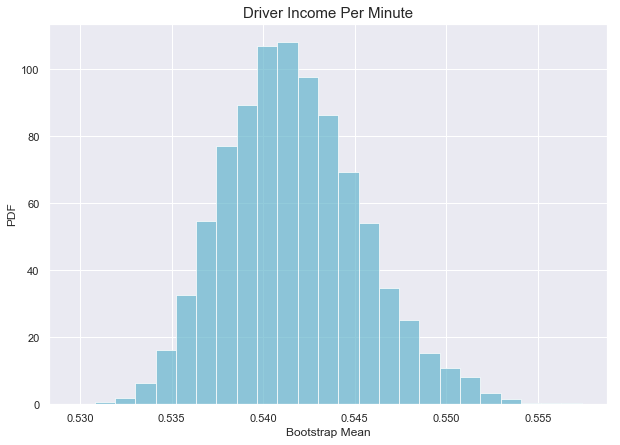

In [181]:
pooled_reps = bootstrap_plot(df['Income_Per_Minute'], title = 'Driver Income Per Minute')

## Time

In [185]:
df['month'] = df['Trip Start Timestamp'].dt.month
df['year'] = df['Trip Start Timestamp'].dt.year
df['hour'] = df['Trip Start Timestamp'].dt.hour
df['minute'] = df['Trip Start Timestamp'].dt.minute
df['dayofweek'] = df['Trip Start Timestamp'].dt.dayofweek

In [187]:
df.sort_values(by=['year'])

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Longitude,Dropoff Centroid Location,Driver Income,Income_Per_Minute,month,year,hour,minute,second,dayofweek
31959,1104088527e91d44ccd9cb83e9db9145d524a189,2018-11-08 08:00:00,2018-11-08 08:15:00,1124.0,2.8,1.703184e+10,1.703184e+10,32.0,32.0,5.0,...,-87.632746,POINT (-87.6327464887 41.8809944707),3.750,0.200178,11,2018,8,0,0,3
9188,10d802a772553e42accf76fd75f67325b83d066b,2018-12-20 22:45:00,2018-12-20 22:45:00,217.0,0.9,1.703104e+10,1.703104e+10,4.0,4.0,2.5,...,-87.694096,POINT (-87.6940960217 41.9798553089),1.875,0.518433,12,2018,22,45,0,3
42496,11185edd835dead93afb06c7de2c2b6ac42a0566,2018-12-05 15:15:00,2018-12-05 15:15:00,704.0,3.3,1.703107e+10,1.703183e+10,7.0,28.0,10.0,...,-87.657233,POINT (-87.6572331997 41.8852813201),10.500,0.894886,12,2018,15,15,0,2
9183,10d7fe5305a6c7be6bc87620be875461457dc498,2018-11-15 14:00:00,2018-11-15 15:15:00,4441.0,21.4,1.703184e+10,1.703198e+10,28.0,76.0,35.0,...,-87.903040,POINT (-87.9030396611 41.9790708201),34.250,0.462734,11,2018,14,0,0,3
9178,10d7fc25925f3113ec0a384b4f94f3578e098d27,2018-12-21 23:30:00,2018-12-21 23:45:00,610.0,2.9,1.703107e+10,1.703122e+10,7.0,22.0,5.0,...,-87.695087,POINT (-87.6950866748 41.9284649843),5.750,0.565574,12,2018,23,30,0,4
42501,1118638c9a69b1d94f1366c625c3446d75c6b5ee,2018-11-27 06:45:00,2018-11-27 07:00:00,165.0,0.5,1.703108e+10,1.703108e+10,8.0,8.0,5.0,...,-87.619711,POINT (-87.6197106717 41.8950334495),3.750,1.363636,11,2018,6,45,0,1
32548,11052e7520495d26b719bf660818d55359a6b798,2018-11-05 19:45:00,2018-11-05 20:00:00,939.0,4.3,1.703124e+10,1.703132e+10,24.0,32.0,10.0,...,-87.620993,POINT (-87.6209929134 41.8849871918),7.500,0.479233,11,2018,19,45,0,0
21102,10ef137dd6f9a05d61f9192b6652db5c5ce451d6,2018-12-10 07:30:00,2018-12-10 07:30:00,669.0,2.2,1.703106e+10,1.703184e+10,6.0,8.0,7.5,...,-87.649907,POINT (-87.6499072264 41.9049353016),5.625,0.504484,12,2018,7,30,0,0
32544,11052d0f51a36cfd6a5a2a6901cdaefd850f2eed,2018-12-11 17:15:00,2018-12-11 17:45:00,2147.0,8.9,1.703184e+10,1.703184e+10,38.0,32.0,5.0,...,-87.632746,POINT (-87.6327464887 41.8809944707),4.750,0.132743,12,2018,17,15,0,1
42509,1118676c69ed3ab2c971cdc3aee62a57e5476b24,2018-12-06 20:30:00,2018-12-06 20:45:00,970.0,1.8,1.703108e+10,1.703184e+10,8.0,24.0,5.0,...,-87.653614,POINT (-87.6536139825 41.8983058696),3.750,0.231959,12,2018,20,30,0,3


In [188]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
dr = pd.date_range(start='2018-01-01', end='2019-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df['holiday'] = df['Trip Start Timestamp'].dt.date.astype('datetime64').isin(holidays)

In [189]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Location,Driver Income,Income_Per_Minute,month,year,hour,minute,second,dayofweek,holiday
1,10c6064e84c7fc8f7ff8d4e04292bcf6ffbd16ca,2019-03-25 07:00:00,2019-03-25 07:15:00,611.0,2.5,1.703171e+10,1.703184e+10,71.0,44.0,7.5,...,POINT (-87.6300448953 41.7424875717),5.625,0.552373,3,2019,7,0,0,0,False
3,10c6067562c3e18d92f7a2bbbcd1ccab5bb28088,2019-02-24 11:00:00,2019-02-24 11:15:00,873.0,5.2,1.703184e+10,1.703184e+10,28.0,23.0,10.0,...,POINT (-87.7335180512 41.8952576428),7.500,0.515464,2,2019,11,0,0,6,False
4,10c606b8d23f1e9e7737b1ca8bc96ecce543106a,2019-01-06 12:15:00,2019-01-06 12:45:00,1941.0,7.4,1.703108e+10,1.703108e+10,8.0,8.0,17.5,...,POINT (-87.6262149064 41.8925077809),13.125,0.405719,1,2019,12,15,0,6,False
5,10c606cef628842c786b89e1c065bf9a6f41a957,2019-01-25 17:00:00,2019-01-25 17:30:00,1128.0,2.5,1.703124e+10,1.703128e+10,24.0,28.0,2.5,...,POINT (-87.6428084655 41.8853000224),2.875,0.152926,1,2019,17,0,0,4,False
6,10c606db69c16f847182da6ba76296c5c29d1fd7,2018-11-14 21:45:00,2018-11-14 22:30:00,2250.0,21.3,1.703198e+10,1.703133e+10,76.0,33.0,37.5,...,POINT (-87.6305800611 41.8612808467),35.125,0.936667,11,2018,21,45,0,2,False


In [190]:
df.groupby(['dayofweek']).mean()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Driver Income,Income_Per_Minute,month,year,hour,minute,second,holiday
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,956.379709,4.712318,1.703137e+10,1.703139e+10,23.060764,24.531757,9.632939,0.492989,2.710203,12.836131,...,41.897678,-87.660502,7.717693,0.537797,3.822106,2018.812758,13.804234,22.440198,0.0,0.153148
1,963.962610,4.391617,1.703138e+10,1.703139e+10,22.788045,23.166230,8.995594,0.488450,2.506597,11.990641,...,41.896818,-87.657119,7.235145,0.510741,3.547988,2018.831627,14.037152,22.955466,0.0,0.073589
2,974.002413,4.548782,1.703138e+10,1.703139e+10,22.948372,23.597829,9.279855,0.488540,2.583522,12.351918,...,41.896437,-87.658427,7.448432,0.521046,3.735344,2018.818335,14.416164,22.429433,0.0,0.000000
3,985.638574,4.495343,1.703137e+10,1.703139e+10,22.718319,23.487533,9.561096,0.534103,2.638675,12.733874,...,41.897784,-87.659695,7.704925,0.529616,3.563775,2018.831444,14.650113,23.360808,0.0,0.008448
4,983.729902,4.340094,1.703136e+10,1.703136e+10,22.702153,22.285402,9.512277,0.516482,2.617279,12.646038,...,41.897991,-87.657779,7.650690,0.542675,3.616213,2018.840565,15.405146,22.956609,0.0,0.000000
5,863.353472,3.869041,1.703131e+10,1.703132e+10,19.646829,19.862338,8.886384,0.502705,2.538084,11.927173,...,41.903523,-87.655612,7.167493,0.557773,3.680794,2018.837842,14.753231,22.518034,0.0,0.000000
6,860.322573,4.606434,1.703131e+10,1.703133e+10,20.218833,21.445013,9.120659,0.516028,2.605183,12.241870,...,41.905862,-87.662387,7.356523,0.580511,3.839047,2018.816785,12.040071,22.126002,0.0,0.000000


In [191]:
df.groupby(['dayofweek']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Longitude,Dropoff Centroid Location,Driver Income,Income_Per_Minute,month,year,hour,minute,second,holiday
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,...,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637
1,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199,...,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199
2,4145,4145,4145,4145,4145,4145,4145,4145,4145,4145,...,4145,4145,4145,4145,4145,4145,4145,4145,4145,4145
3,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,...,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853
4,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,...,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946
5,6654,6654,6654,6654,6654,6654,6654,6654,6654,6654,...,6654,6654,6654,6654,6654,6654,6654,6654,6654,6654
6,4492,4492,4492,4492,4492,4492,4492,4492,4492,4492,...,4492,4492,4492,4492,4492,4492,4492,4492,4492,4492


In [207]:
# Randomly sample 7 elements from your dataframe
df_elements = df.sample(n=3637)
df_elements2 = df.sample(n=4853)

The actual mean is: 7.455767700288864
The boostrapped mean is: 7.45611266497113
The standard error of the mean is: 0.03115344650597049
The standard deviation of the bootstrapped mean is: 0.09456862995138786
We are 95% confident that the true mean is captured by the following interval: [7.27233297 7.64414352]
We are 99% confident that the true mean is captured by the following interval: [7.21834049 7.70274333]


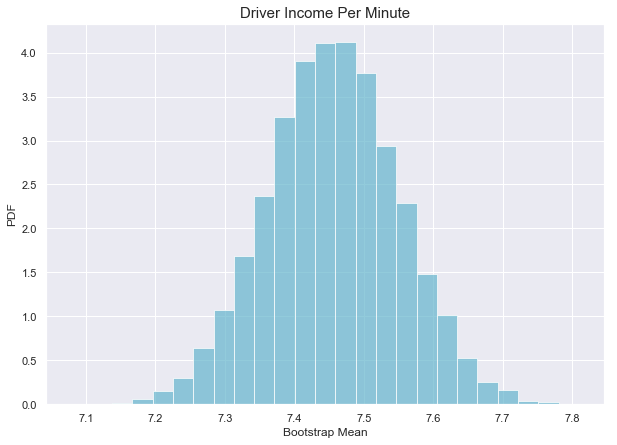

array([7.45734809, 7.58496013, 7.3987146 , ..., 7.41631152, 7.4757355 ,
       7.5316882 ])

In [206]:
bootstrap_plot(df['Driver Income'], df_elements, title = 'Driver Income Per Minute')

The actual mean is: 7.455767700288864
The boostrapped mean is: 7.454924258190809
The standard error of the mean is: 0.03115344650597049
The standard deviation of the bootstrapped mean is: 0.08234378660512286
We are 95% confident that the true mean is captured by the following interval: [7.29347762 7.61637454]
We are 99% confident that the true mean is captured by the following interval: [7.24515545 7.67381645]


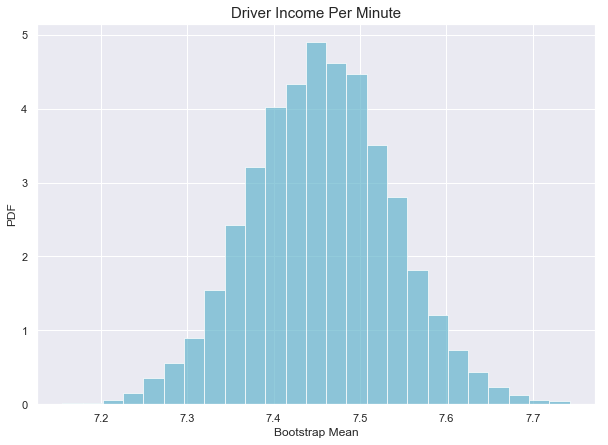

array([7.58891407, 7.41126623, 7.39599217, ..., 7.59713064, 7.47810633,
       7.42983721])

In [208]:
bootstrap_plot(df['Driver Income'], df_elements2, title = 'Driver Income Per Minute')

In [194]:
df_elements.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Driver Income,Income_Per_Minute,month,year,hour,minute,second,dayofweek
count,3637.000000,3637.000000,3.637000e+03,3.637000e+03,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,...,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.0,3637.000000
mean,938.596921,4.410146,1.703135e+10,1.703136e+10,21.559527,22.193841,9.167583,0.499313,2.628710,12.295606,...,41.900717,-87.658619,7.375000,0.529732,3.690954,2018.827055,14.362112,22.436074,0.0,3.262854
std,640.196503,4.366536,3.228958e+05,3.290532e+05,17.144907,17.959681,6.618506,1.307427,1.671739,8.110707,...,0.048576,0.051806,5.470547,0.261599,3.642836,0.378251,5.990828,16.626324,0.0,1.881728
min,64.000000,0.200000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,...,41.663760,-87.903040,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.0,0.000000
25%,484.000000,1.500000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.550000,7.550000,...,41.880994,-87.671406,3.750000,0.391986,1.000000,2019.000000,10.000000,15.000000,0.0,2.000000
50%,774.000000,2.900000,1.703124e+10,1.703124e+10,22.000000,22.000000,7.500000,0.000000,2.550000,10.050000,...,41.895033,-87.646293,5.625000,0.494341,2.000000,2019.000000,16.000000,15.000000,0.0,3.000000
75%,1197.000000,5.500000,1.703183e+10,1.703183e+10,32.000000,32.000000,10.000000,0.000000,2.550000,14.550000,...,41.929047,-87.631407,9.375000,0.630252,3.000000,2019.000000,19.000000,30.000000,0.0,5.000000
max,6595.000000,40.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,80.000000,16.000000,12.630000,104.600000,...,42.021224,-87.546695,76.000000,3.515625,12.000000,2019.000000,23.000000,45.000000,0.0,6.000000


The actual mean is: 7.455767700288864
The boostrapped mean is: 7.455498474989683
The standard error of the mean is: 0.03115344650597049
The standard deviation of the bootstrapped mean is: 0.031112320560549425
We are 95% confident that the true mean is captured by the following interval: [7.39380895 7.51722913]
We are 99% confident that the true mean is captured by the following interval: [7.37642938 7.53741288]


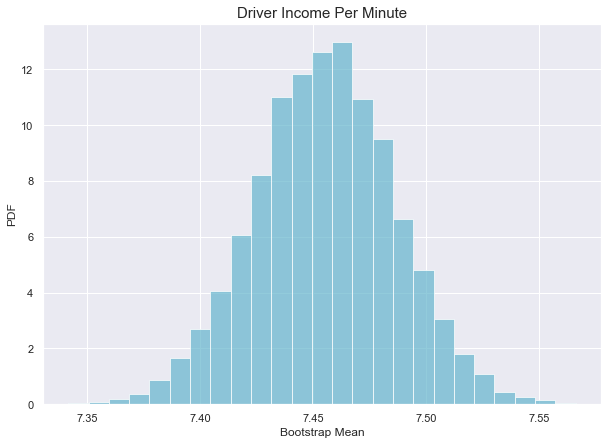

array([7.4457422 , 7.49620498, 7.41945705, ..., 7.44071656, 7.43352075,
       7.45501238])

In [209]:
bootstrap_plot(df['Driver Income'], df, title = 'Driver Income Per Minute')

The actual mean is: 0.5068384130165655
The boostrapped mean is: 0.506979166421034
The standard error of the mean is: 0.007334702658957736
The standard deviation of the bootstrapped mean is: 0.007377342402220411
We are 95% confident that the true mean is captured by the following interval: [0.49271871 0.52157711]
We are 99% confident that the true mean is captured by the following interval: [0.48871043 0.52608648]


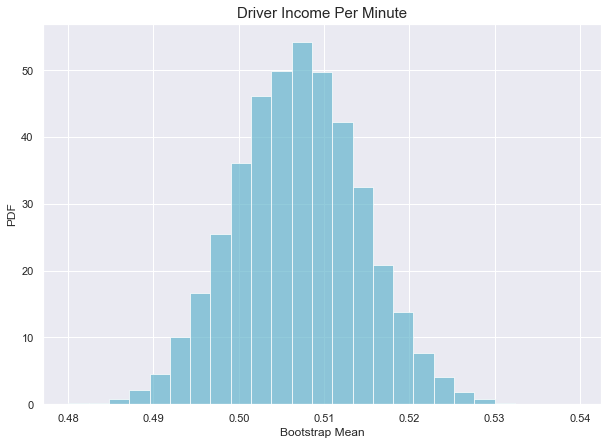

array([0.5137063 , 0.50769321, 0.50621942, ..., 0.48803278, 0.50884278,
       0.51282202])

In [211]:
bootstrap_plot(df['Tip'], df, title = 'Driver Income Per Minute')

The actual mean is: 0.5297319607952399
The boostrapped mean is: 0.529632399565933
The standard error of the mean is: 0.004337146230176052
The standard deviation of the bootstrapped mean is: 0.004301649383245949
We are 95% confident that the true mean is captured by the following interval: [0.52129469 0.53815372]
We are 99% confident that the true mean is captured by the following interval: [0.51861362 0.54095462]


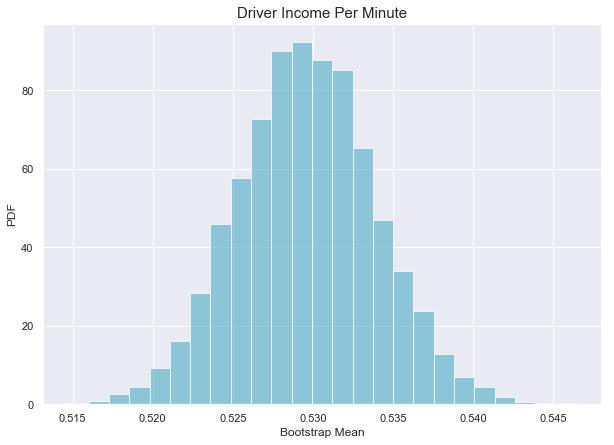

array([0.53197331, 0.53303508, 0.52509635, ..., 0.5259891 , 0.54242685,
       0.52888395])

In [195]:
bootstrap_plot(df_elements['Income_Per_Minute'], title = 'Driver Income Per Minute')

In [212]:
df.groupby(['hour']).mean()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Driver Income,Income_Per_Minute,month,year,minute,second,dayofweek,holiday
hour,,,,,,,,,,,,,,,,,,,,,
0,722.590180,3.863226,1.703132e+10,1.703126e+10,19.085170,18.217435,8.193888,0.468938,2.336313,10.999138,...,41.909329,-87.655973,6.614354,0.617200,3.934870,2018.801603,21.132265,0.0,4.467936,0.044088
1,737.119488,3.957041,1.703129e+10,1.703127e+10,17.726885,17.169275,8.431721,0.395448,2.370583,11.197752,...,41.914488,-87.658053,6.719239,0.607750,3.739687,2018.825036,20.248933,0.0,4.735420,0.059744
2,677.375286,3.701602,1.703126e+10,1.703126e+10,14.791762,17.345538,8.175057,0.297483,2.359703,10.832243,...,41.915032,-87.659764,6.428776,0.639729,3.700229,2018.816934,18.672769,0.0,4.755149,0.109840
3,744.544186,4.231628,1.703127e+10,1.703130e+10,15.934884,21.595349,8.813953,0.469767,2.598930,11.882651,...,41.915680,-87.670532,7.080233,0.670249,3.851163,2018.809302,18.418605,0.0,4.646512,0.148837
4,950.427481,8.421374,1.703130e+10,1.703158e+10,19.488550,38.679389,13.664122,0.534351,4.008473,18.206947,...,41.904369,-87.724668,10.782443,0.695696,3.839695,2018.809160,24.389313,0.0,3.984733,0.061069
5,1138.842553,9.230638,1.703128e+10,1.703164e+10,18.817021,42.340426,16.000000,0.800000,4.415574,21.215574,...,41.910130,-87.737571,12.800000,0.719083,4.178723,2018.778723,28.212766,0.0,2.489362,0.059574
6,1093.357265,6.685641,1.703130e+10,1.703154e+10,21.288889,31.287179,12.525641,0.557265,3.383419,16.466325,...,41.896785,-87.685759,9.951496,0.564509,3.548718,2018.846154,27.666667,0.0,2.427350,0.022222
7,1118.428355,4.823882,1.703131e+10,1.703151e+10,22.196361,27.505686,9.982942,0.455648,2.608537,13.047127,...,41.886747,-87.660789,7.942854,0.475452,3.401820,2018.855951,25.041698,0.0,2.360121,0.016679
8,1094.635769,4.156052,1.703133e+10,1.703147e+10,22.895311,26.244275,9.657852,0.443839,2.409580,12.511270,...,41.887757,-87.653072,7.687227,0.520674,3.640131,2018.832061,23.718648,0.0,2.504907,0.020720


In [213]:
df.groupby(['hour']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Longitude,Dropoff Centroid Location,Driver Income,Income_Per_Minute,month,year,minute,second,dayofweek,holiday
hour,,,,,,,,,,,,,,,,,,,,,
0,998,998,998,998,998,998,998,998,998,998,...,998,998,998,998,998,998,998,998,998,998
1,703,703,703,703,703,703,703,703,703,703,...,703,703,703,703,703,703,703,703,703,703
2,437,437,437,437,437,437,437,437,437,437,...,437,437,437,437,437,437,437,437,437,437
3,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
4,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
5,235,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
6,585,585,585,585,585,585,585,585,585,585,...,585,585,585,585,585,585,585,585,585,585
7,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,...,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
8,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,...,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834
